In [1]:
# Import standard libraries
import os

# Third-Party Libraries
import numpy as np
import matplotlib.pyplot as plt

# Import the Swarm Systems Lab Simulator
from ssl_simulator import SimulationEngine
from ssl_simulator.robot_models import Unicycle2D
from ssl_simulator.data_manager import load_sim
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

# Import custom functions and classes
from visualization import PlotBasicGvf
from controllers import GvfIK
from ssl_simulator.gvf_trajectories import GvfEllipse, GvfLine

# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE = os.path.join(OUTPUT_DIR, "data.csv")

# GVF-IK for path following with induced oscillations

## Ellipse $N = 1$

In [6]:
# Define the initial state
N = 1

p = np.ones((N,2)) * np.array([[150,-200]])
speed = np.ones((N)) * np.array([14])
theta = np.ones((N)) * np.array([-90])

x0 = [p, speed, theta]

# Controller settings
A = np.ones((N)) * 0.3
omega = np.ones((N)) * np.pi/4

# --------------------------------
# Generate the trajectory to be followed
a, b = 100, 60
XYoff, alpha = [0, 0], 0

gvf_traj = GvfEllipse(XYoff,alpha,a,b)

# Select the robot model
robot_model = Unicycle2D(x0, omega_lims=[-np.pi/4, np.pi/4])

# Initialize the controller
s, ke, kn = 1, 0.35, 1
controller = GvfIK(gvf_traj, s, ke, kn, A, omega)


# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt)

# --------------------------------
# Run the simulation and save data
tf = 30

simulator.run(tf)
simulator.logger.save(SIMDATA_FILE)
# --------------------------------

Running simulation: 100%|██████████| 3000/3000 [00:00<00:00, 16048.36it/s]


time:  (3001,)
p:  (3001, 1, 2)
speed:  (3001, 1)
theta:  (3001, 1)
p_dot:  (3001, 1, 2)
speed_dot:  (3001, 1)
theta_dot:  (3001, 1)
u:  (3001, 1)
s:  (3001,)
ke:  (3001,)
kn:  (3001,)
gamma_omega:  (3001, 1)
gamma_A:  (3001, 1)
gamma:  (3001, 1)
phi:  (3001, 1)
e:  (3001, 1)
alpha:  (3001, 1)
omega_d:  (3001, 1)
ut_norm:  (3001, 1)
un_norm:  (3001, 1)


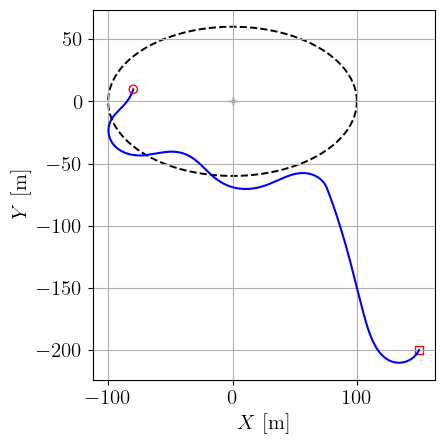

In [7]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGvf(simulation_data, gvf_traj)

# Generate and display the plot
ax = plotter.plot(alpha=1)

plt.show()

## Ellipse $N = 3$

In [12]:
# Define the initial state
N = 3

p = np.ones((N,2)) * np.array([[150,-200]])
speed = np.ones((N)) * np.array([14])
theta = np.ones((N)) * np.array([-90])

x0 = [p, speed, theta]

# Controller settings
A = np.array([0,0.3,0.45])
omega = np.ones((N)) * np.pi/5

# --------------------------------
# Generate the trajectory to be followed
a, b = 100, 60
XYoff, alpha = [0, 0], 0

gvf_traj = GvfEllipse(XYoff,alpha,a,b)

# Select the robot model
robot_model = Unicycle2D(x0)

# Initialize the controller
s, ke, kn = 1, 0.5, 1
controller = GvfIK(gvf_traj, s, ke, kn, A, omega)


# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt)

# --------------------------------
# Run the simulation and save data
tf = 40

simulator.run(tf)
simulator.logger.save(SIMDATA_FILE)
# --------------------------------

Running simulation:   0%|          | 0/4000 [00:00<?, ?it/s]

Running simulation: 100%|██████████| 4000/4000 [00:00<00:00, 10912.98it/s]


time:  (4001,)
p:  (4001, 3, 2)
speed:  (4001, 3)
theta:  (4001, 3)
p_dot:  (4001, 3, 2)
speed_dot:  (4001, 3)
theta_dot:  (4001, 3)
u:  (4001, 3)
s:  (4001,)
ke:  (4001,)
kn:  (4001,)
gamma_omega:  (4001, 3)
gamma_A:  (4001, 3)
gamma:  (4001, 3)
phi:  (4001, 3)
e:  (4001, 3)
alpha:  (4001, 3)
omega_d:  (4001, 3)
ut_norm:  (4001, 3)
un_norm:  (4001, 3)


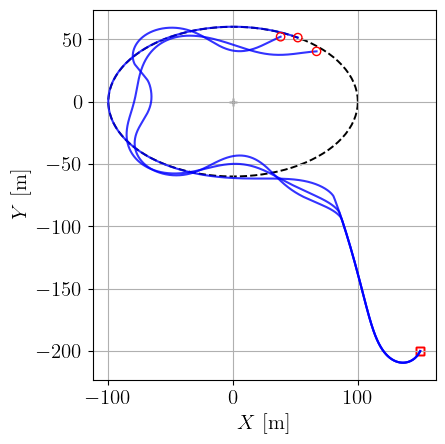

In [13]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGvf(simulation_data, gvf_traj)

# Generate and display the plot
ax = plotter.plot(alpha=0.8)

plt.show()

## Line $N = 3$

In [2]:
# Define the initial state
N = 3

p = np.ones((N,2)) * np.array([[10,10]])
speed = np.ones((N)) * np.array([14])
theta = np.ones((N)) * np.array([-90])

x0 = [p, speed, theta]

# Controller settings
A = np.array([0,8,16])
omega = np.ones((N)) * np.pi/4

# --------------------------------
# Generate the trajectory to be followed
m, a = 0, 0
gvf_traj = GvfLine(m, a, line_length=350)

# Select the robot model
robot_model = Unicycle2D(x0)

# Initialize the controller
s, ke, kn = 1, 0.4, 1
controller = GvfIK(gvf_traj, s, ke, kn, A, omega)


# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt)

# --------------------------------
# Run the simulation and save data
tf = 20

simulator.run(tf)
simulator.logger.save(SIMDATA_FILE)
# --------------------------------

Running simulation: 100%|██████████| 2000/2000 [00:00<00:00, 10918.00it/s]


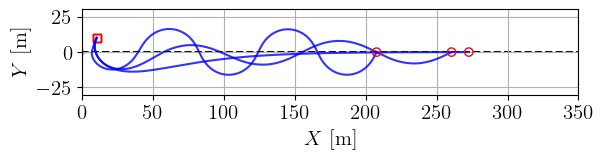

In [3]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=False)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGvf(simulation_data, gvf_traj)

# Generate and display the plot
ax = plotter.plot(alpha=0.8)
ax.set_xlim([0, gvf_traj.line_length])
ax.set_ylim([-30,30])

plt.show()